# Practice Exercise - Linear Regression

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- LSTAT: %lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.

### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display, clear_output

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Load the dataset

In [3]:
df = pd.read_csv("boston.csv")
df.head()

CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2

### Check the shape of the dataset

In [4]:
df.shape

(506, 13)

### Get the info regarding column datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


### Get summary statistics for the numerical columns

In [6]:
df.describe().T

count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NX       506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
LSTAT    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
MEDV     506.0   22.532806    9.197104    5.00000   17.025000   21.20000   

                75%       max  
CRIM       3.677083   88.9762  
ZN        12.500000  100.0000  
INDUS     18.100000   27.7400  
CHAS       0.000000    1.0000  
NX         0.624000    0.8710  
RM         6.623500    8.7800  
AGE       94.075000  100.0000  
DIS        5.188425   12.1265  
RAD       24.000000   24.0000  
TAX      666.000000  711.0000  
PTRATIO   20.200000   22.0000  
LSTAT     16.955000   37.9700  
MEDV      25.000000   50.0000

**For the column `CHAS`, replace the 1 values with '*yes*' and 0 values with '*no*'.**

In [7]:
def replace_with_yes_no(row):
    if row == 1:
        return "yes"
    elif row == 0: 
        return "no" 
    else:
        return "error"
    
df['CHAS'] = df['CHAS'].apply(lambda row: replace_with_yes_no(row))

### Exploratory Data Analysis

**Plot the distribution plots for all the numerical features and list your observations.**

In [8]:
num_features = df.select_dtypes(include=['number']);


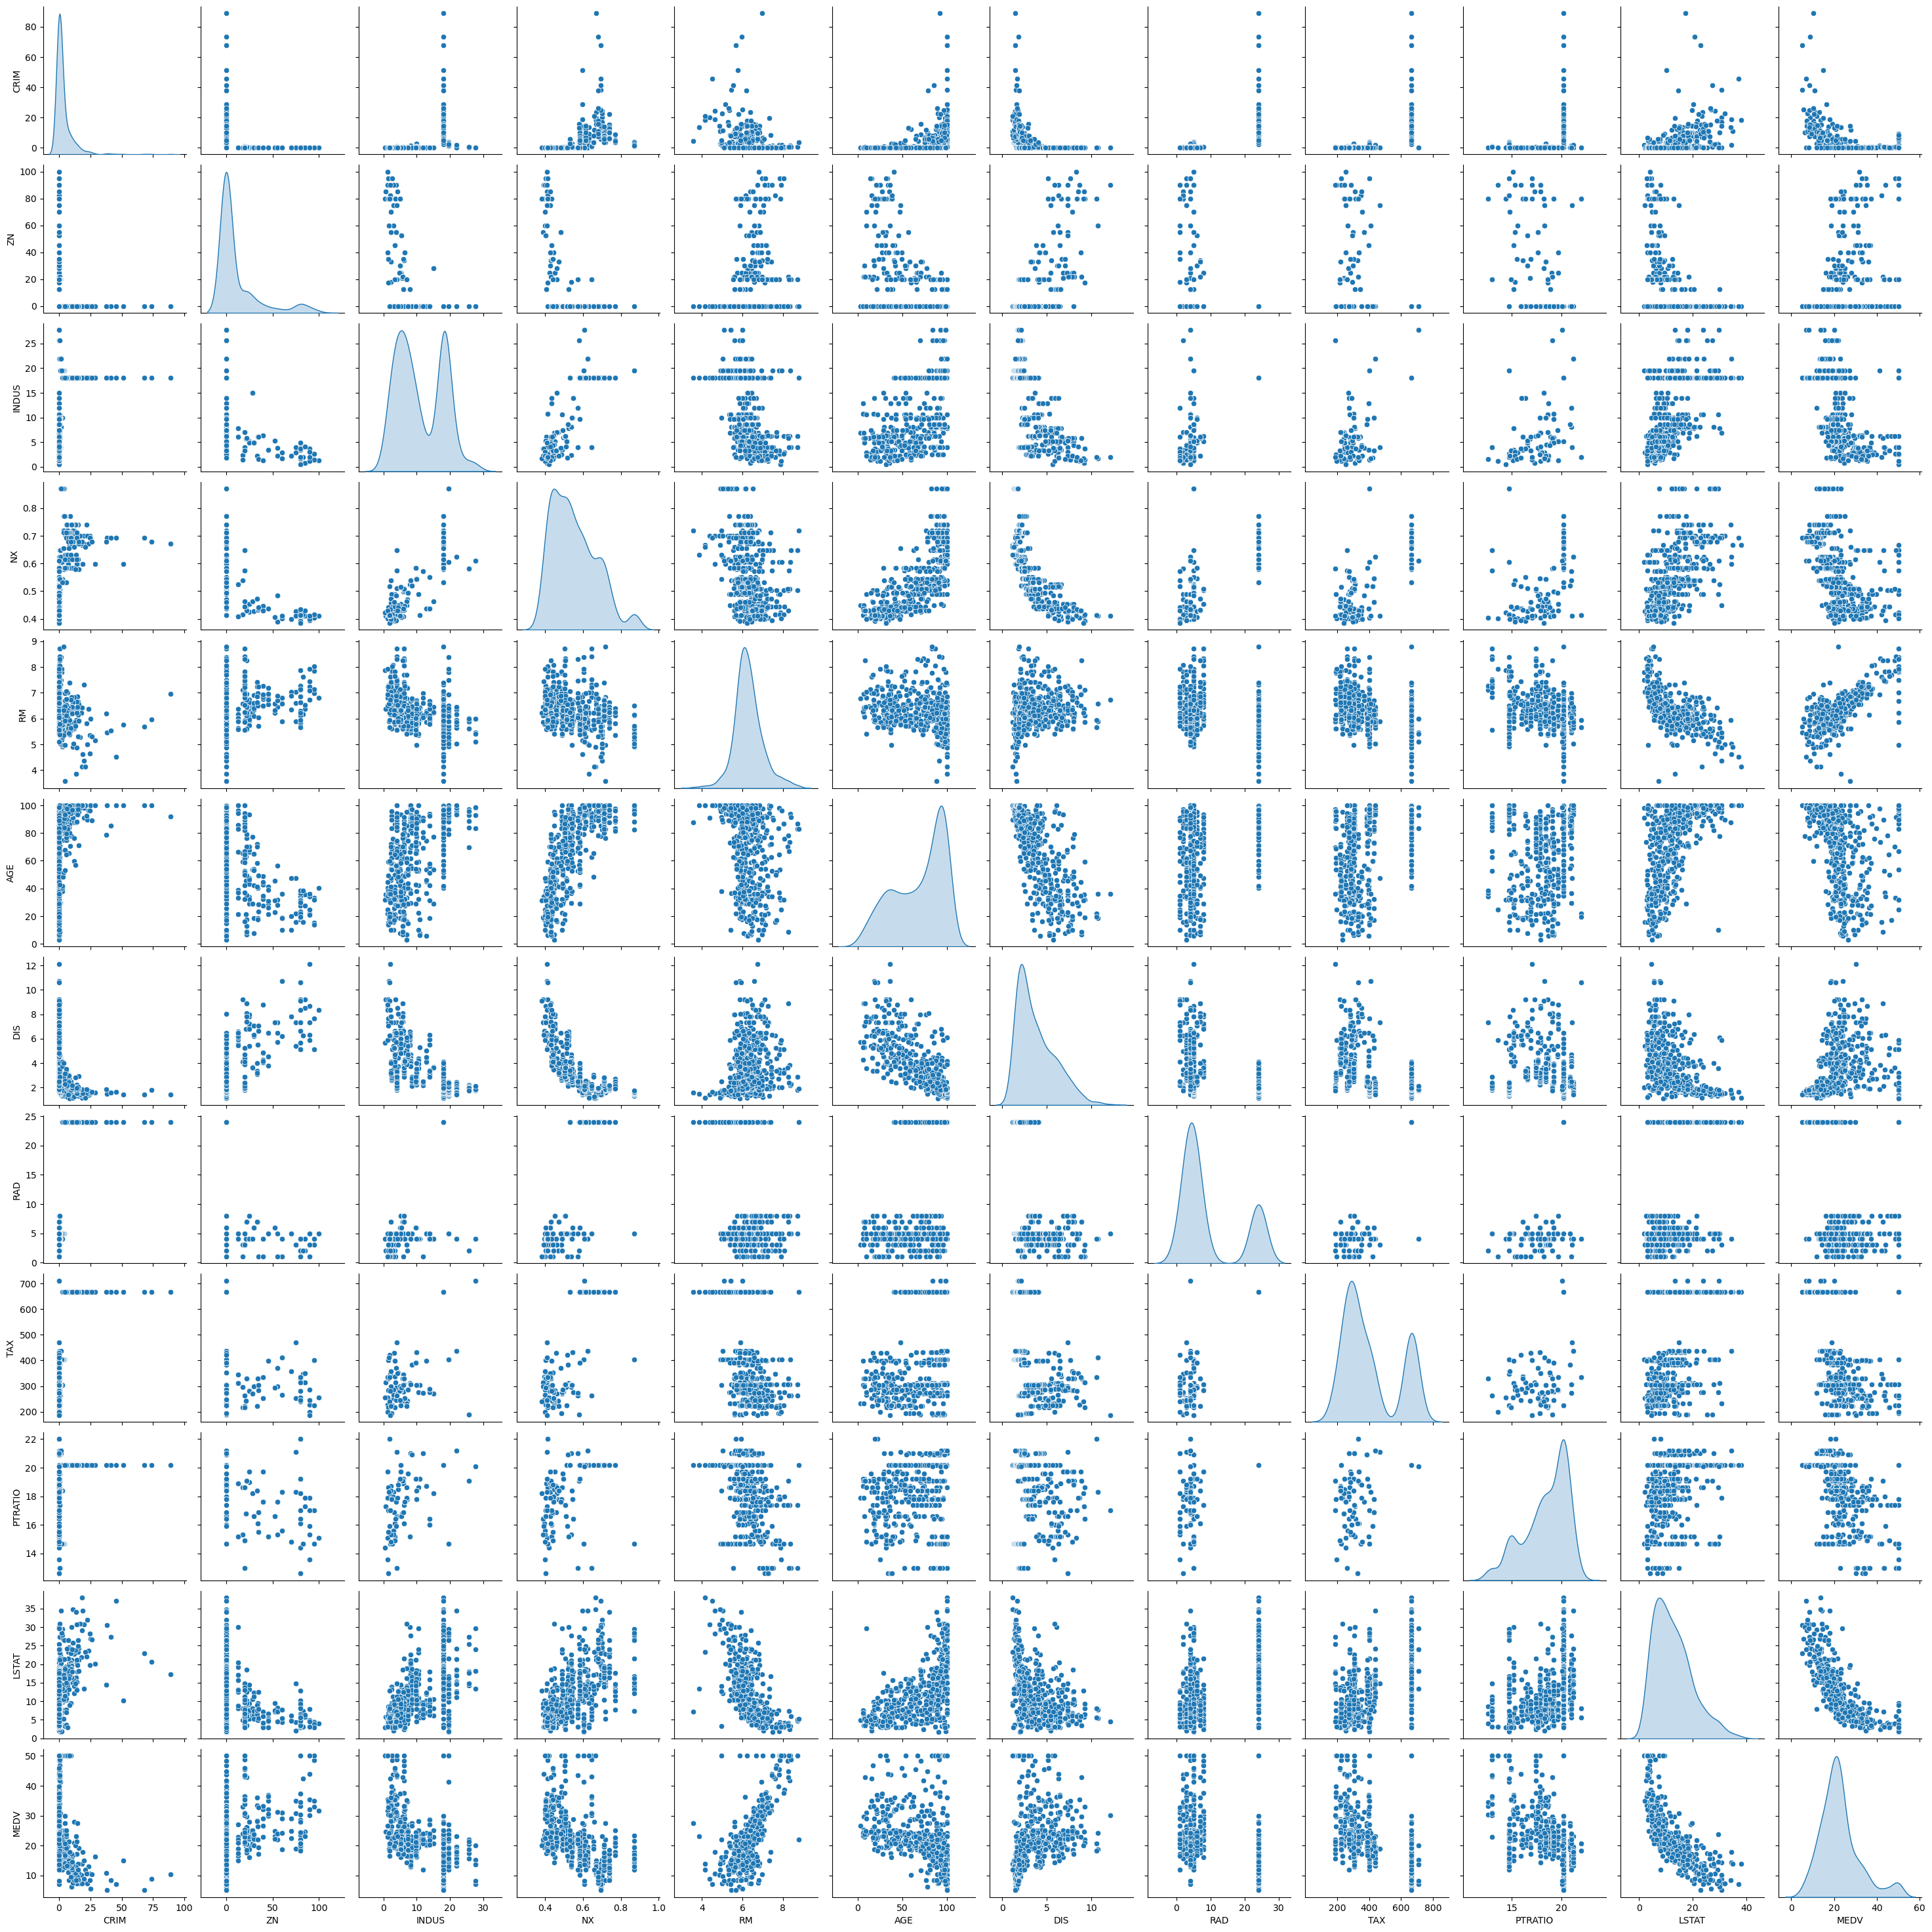

In [9]:
sns.pairplot(num_features,diag_kind='kde')

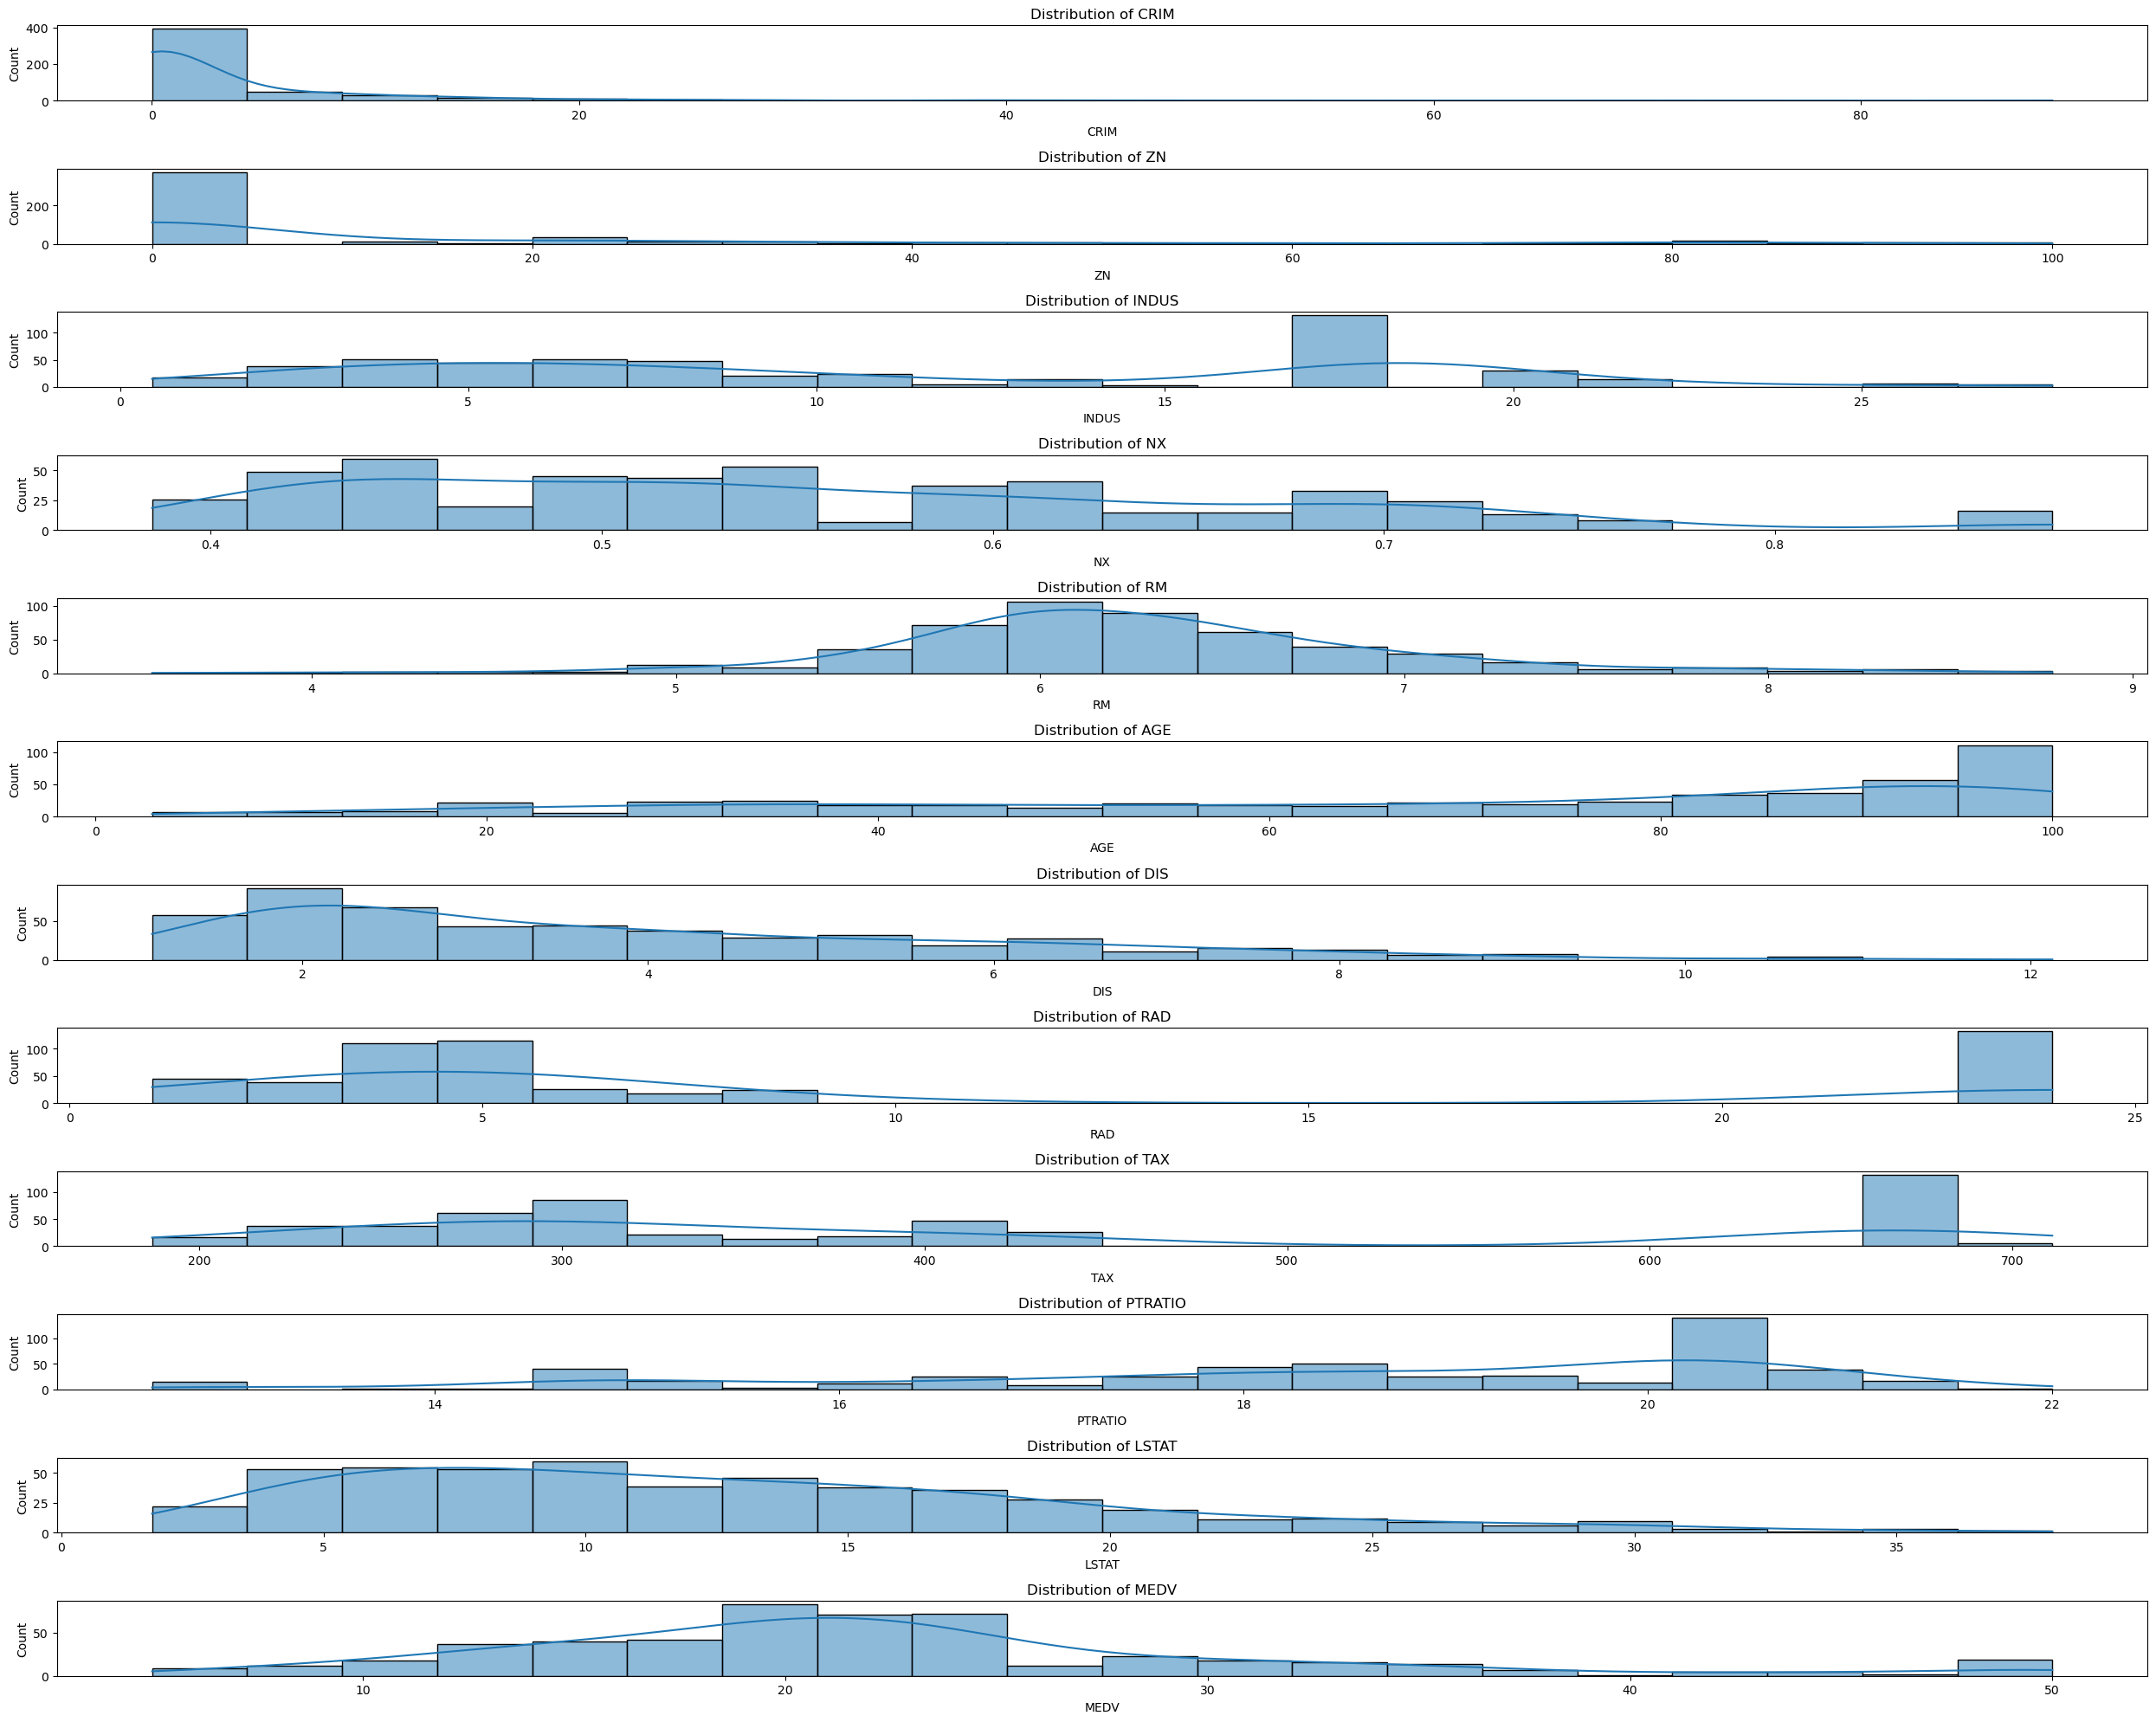

In [10]:
fig, axes = plt.subplots(nrows=len(num_features.columns), ncols=1, figsize=(25, 20))

for i,column in enumerate(num_features.columns):
    ax = axes[i]
    fig = sns.histplot(num_features, x=column, bins=20,kde=True,ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
plt.tight_layout()
plt.show()

**Plot the scatterplots for features and the target variable `MEDV` and list your observations.**

In [11]:
columns = list(num_features.columns).copy()
columns.remove('MEDV')
print(columns)

['CRIM', 'ZN', 'INDUS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']


In [12]:
fig = make_subplots(rows=len(columns), cols=1, 
                       subplot_titles=columns)
for i,column in enumerate(columns):
    plt.figure(figsize=(6, 6))
    scatter = go.Scatter(x=num_features[column], y=num_features['MEDV'], mode='markers')
    fig.add_trace(scatter, row=i+1, col=1)

fig.update_layout(title='Subplots with Scatter Plots', showlegend=False)
fig.update_layout(
    width=800,
    height=2500,
)
fig.show()

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

**Plot the correlation heatmap and list your observations.**

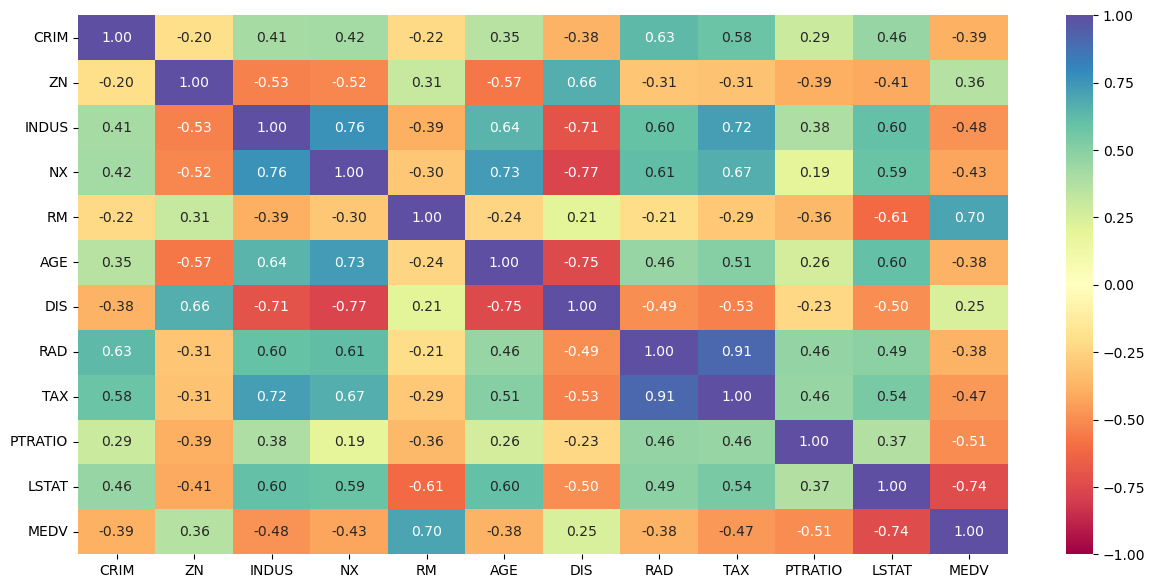

In [13]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True,vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Split the dataset

Split the data into the dependent and independent variables, create dummy variables for the categorical variables, add a constant to the independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [14]:
df = pd.get_dummies(df, columns=['CHAS'],drop_first=True)

In [15]:
y = df['MEDV']
X = df.drop('MEDV',axis=1)
X.head()

CRIM    ZN  INDUS     NX     RM   AGE     DIS  RAD  TAX  PTRATIO  LSTAT  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900    1  296     15.3   4.98   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671    2  242     17.8   9.14   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671    2  242     17.8   4.03   
3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622    3  222     18.7   2.94   
4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622    3  222     18.7   5.33   

   CHAS_yes  
0         0  
1         0  
2         0  
3         0  
4         0

In [16]:
X = sm.add_constant(X)
X.head()

const     CRIM    ZN  INDUS     NX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0    1.0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900    1  296     15.3   
1    1.0  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671    2  242     17.8   
2    1.0  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671    2  242     17.8   
3    1.0  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622    3  222     18.7   
4    1.0  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  CHAS_yes  
0   4.98         0  
1   9.14         0  
2   4.03         0  
3   2.94         0  
4   5.33         0

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
len(model.coef_)


13

In [20]:
len(X_train.columns)

13

In [21]:
model.coef_

array([ 0.00000000e+00, -1.13844848e-01,  6.11702680e-02,  5.41034650e-02,
       -2.22485023e+01,  2.69841282e+00,  4.83604728e-03, -1.53429538e+00,
        2.98833255e-01, -1.14135806e-02, -9.88914626e-01, -5.86132851e-01,
        2.51751196e+00])

In [22]:
for i,col in enumerate(X_train.columns):
    print(col,model.coef_[i])

const 0.0
CRIM -0.11384484836913739
ZN 0.061170268040601106
INDUS 0.054103464958738176
NX -22.24850234508433
RM 2.698412820009914
AGE 0.004836047284749402
DIS -1.534295381999258
RAD 0.2988332548590113
TAX -0.011413580552025298
PTRATIO -0.9889146257039373
LSTAT -0.5861328508499204
CHAS_yes 2.5175119591226984


In [23]:
model.score(X_train,y_train)

0.7073732058856179

In [24]:
model.score(X_test,y_test)

0.7721684899134165

In [25]:
poly = PolynomialFeatures(degree=2,interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(X_train2,y_train)
y_pred = poly_clf.predict(X_test2)
print(poly_clf.score(X_train2,y_train))

0.9109078171546156


In [26]:
poly_clf.score(X_test2,y_test)

0.8729755968861568

In [27]:
#plt.scatter(X_train, y_train)
#plt.plot(X_train, model.predict(X_train))
#plt.show()

In [28]:
predictions = model.predict(X_train)

### Model Building

**Make the linear model using statsmodels OLS and print the model summary.**

In [29]:
model = sm.OLS(y_train, X_train).fit()
 
# printing the summary table
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     68.69
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           2.38e-83
Time:                        12:58:37   Log-Likelihood:                -1063.0
No. Observations:                 354   AIC:                             2152.
Df Residuals:                     341   BIC:                             2202.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.8852      6.107      8.168      0.0

**Get the value of the coefficient of determination.**

In [30]:
print(model.rsquared)

0.7073732058856179


**Get the predictions on test set**

In [31]:
prediction_train = model.predict(X_train)
prediction_test = model.predict(X_test)
prediction_test.head()

307    32.401501
343    27.887341
47     17.737617
67     21.686439
362    18.642772
dtype: float64

**Calculate MSE for training set**

In [32]:
mse_train = np.mean((y_train - prediction_train) ** 2) 
print(mse_train)
print(
    "The Mean Square Error (MSE) of the model for the training set is ",
    mean_squared_error(y_train, model.predict(X_train)),
)


23.758095295443876
The Mean Square Error (MSE) of the model for the training set is  23.758095295443866


**Calculate MSE for test set**

In [33]:
mse_test  = np.mean((y_test - prediction_test) ** 2)
print(mse_test)
print(
    "The Mean Square Error (MSE) of the model for the training set is ",
    mean_squared_error(y_test, model.predict(X_test)),
)



20.881780202613967
The Mean Square Error (MSE) of the model for the training set is  20.88178020261397


**Get the RMSE on training set**

In [34]:
rmse_train = np.sqrt(np.mean((prediction_train - y_train)**2))
rmse_train

4.874227661429437

**Get the RMSE on test set**

In [35]:
rmse_test = np.sqrt(np.mean((prediction_test - y_test)**2))
rmse_test

4.569658652745735

**Automate the equation of fit**

In [36]:
# Let us write the equation of linear regression
Equation = "Price ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(model.params[i], "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            "(",
            model.params[i],
            ")*(",
            X_train.columns[i],
            ")",
            "+",
            end=" ",
        )
    else:
        print("(", model.params[i], ")*(", X_train.columns[i], ")")

Price = 49.88523466381784 + ( -0.11384484836913225 )*( CRIM ) + ( 0.06117026804059549 )*( ZN ) + ( 0.05410346495874516 )*( INDUS ) + ( -22.248502345084187 )*( NX ) + ( 2.698412820009932 )*( RM ) + ( 0.004836047284749276 )*( AGE ) + ( -1.5342953819992327 )*( DIS ) + ( 0.29883325485900786 )*( RAD ) + ( -0.011413580552026239 )*( TAX ) + ( -0.9889146257039602 )*( PTRATIO ) + ( -0.5861328508499175 )*( LSTAT ) + ( 2.5175119591226993 )*( CHAS_yes )
